# This Notebook describes the simulation of a pulse in the FPAsim.
## Particularly it describes the need of an oversampling of the pulse
## shape in order to simulate random time arrivals.
### L. Ravera @IRAP
### July 18, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt

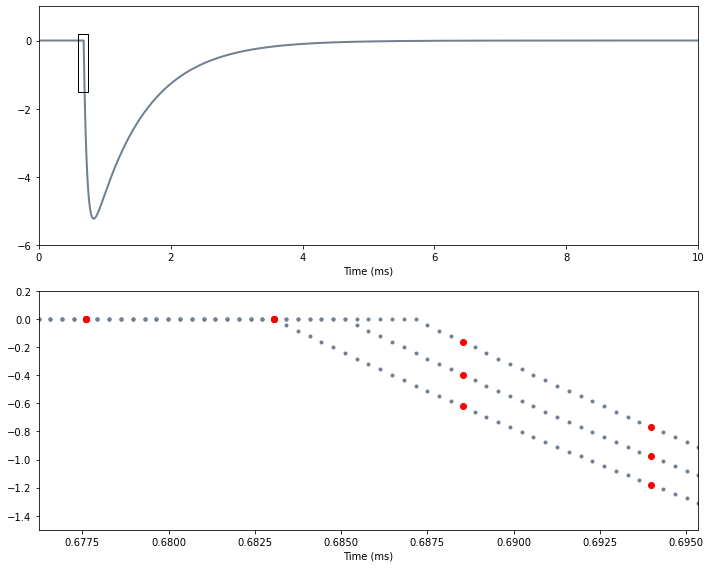

In [34]:
os_factor = 16 # oversampling factor

npts=2**12
npts_os = npts * os_factor

f_frame = 183e3
f_sampling = f_frame * os_factor
t_os = np.arange(npts_os) / f_sampling

# Trise / Tfall at L for LPA2.5A pixel
taurise=52.75e-6
taufall=785.35e-6
pulse_os=np.zeros(len(t_os))
i1=2000
pulse_os[i1:]+=6.8*(np.exp(-t_os[:-i1]/taurise)-np.exp(-t_os[:-i1]/taufall))

c='slategrey'

fig=plt.figure(1,(10,8))

ax1=fig.add_subplot(2,1,1)
ax1.plot(t_os*1e3, pulse_os, linewidth=2, color=c)

lw=1
ax1.plot([0.6, 0.75], [-1.5, -1.5], 'k', linewidth=lw)
ax1.plot([0.6, 0.75], [0.2, 0.2], 'k', linewidth=lw)
ax1.plot([0.6, 0.6], [-1.5, 0.2], 'k', linewidth=lw)
ax1.plot([0.75, 0.75], [-1.5, 0.2], 'k', linewidth=lw)

ax1.set_xlabel('Time (ms)')
ax1.set_yticks(np.arange(11)*2-10)

ax1.set_xlim(0, 10)
ax1.set_ylim(-6, 1)


ax2=fig.add_subplot(2,1,2)
ax2.plot(t_os*1e3, pulse_os, '.', linewidth=2, color=c)
ax2.plot(t_os[::os_factor]*1e3, pulse_os[::os_factor], 'o', linewidth=2, color='r')

ax2.plot(t_os*1e3, np.roll(pulse_os,6), '.', linewidth=2, color=c)
ax2.plot(t_os[::os_factor]*1e3, np.roll(pulse_os,6)[::os_factor], 'o', linewidth=2, color='r')

ax2.plot(t_os*1e3, np.roll(pulse_os,12), '.', linewidth=2, color=c)
ax2.plot(t_os[::os_factor]*1e3, np.roll(pulse_os,12)[::os_factor], 'o', linewidth=2, color='r')

ax2.set_xlabel('Time (ms)')
#ax2.set_yticks(np.arange(11)*2-10)

ax2.set_xlim(t_os[i1-20]*1e3, t_os[i1+36]*1e3)
ax2.set_ylim(-1.5, 0.2)

fig.tight_layout()
plt.savefig('pulse_sim.png', dpi=300, bbox_inches='tight')
